## Fashion-MNIST Dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Firstly, let's select TensorFlow version 2.x in colab

### 1. Import Tensorflow library and random number generator, also write code to ignore thw warnings

In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [ ]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### 2. Let's load Fashion MNIST dataset

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_val, y_val) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

### 3. Visualize one image using matplotlib

Label: 3


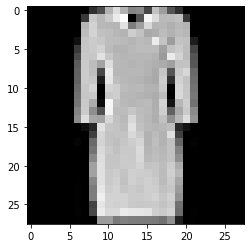

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[9000]))
plt.imshow(X_train[9000], cmap='gray')

### Print shape of the data

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### 4. Reshape features
- reshape() method gives a new shape to an array without changing its data
- You can read more about it here https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

In [ ]:
X_train = X_train.reshape(60000, 784)
print(X_train.shape)
X_val = X_val.reshape(10000, 784)
print(X_val.shape)

(60000, 784)
(10000, 784)


### 5. Normalize features
- Normalize features from 0-255 to 0-1

In [ ]:
print(X_train.max())
print(X_train.min())

X_train = X_train / 255.0
X_val = X_val / 255.0

print(X_train.max())
print(X_train.min())


255
0
1.0
0.0



### 6. One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert X_train and X_val
- number of classes: 10

In [ ]:
print(y_train[10])
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes=10)
print(y_train[10])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 7. Print some images and their labels

label for each of the below image: 9
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 2
label for each of the below image: 7
label for each of the below image: 2
label for each of the below image: 5
label for each of the below image: 5


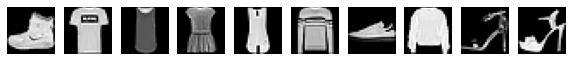

In [ ]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train[0:10][i])))
plt.show()


### 8. Creating model 1 with input shape 784, 256 hidden nodes in layer1 and an output layer, activation - relu, kernel_regularizer = lambda
- Written in a function - to run it multiple times

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers

def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(784,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)

### 9. Creating model 2
- Same model as above
- Instead of accuracy at each epoch below code gives the consolidate accuracy
- Notice: The model.evaluate line at the last is the only difference from model 1

In [ ]:
def train_and_test_loop1(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(784,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score

### 10. Next steps 
- Double Check that the loss is reasonable
- Disable the regularization (Lambda = 0)

In [ ]:
lr = 0.00001
Lambda = 0
train_and_test_loop(1, lr, Lambda)

60/60 [==============================] - 2s 4ms/step - loss: 2.4680 - accuracy: 0.1095


### Question
- Is the loss range correct? What about accuracy, does it make sense for an untrained network

### Answer
- Absolutely! There are 10 output classes and the model is correctly predicting 1 up on 10 times (1/10 = 0.1% approx) as it is untrained.

### 11. Now, lets crank up the Lambda(Regularization)and check what it does to our loss function.

In [ ]:
lr = 0.00001
Lambda = 1e3
train_and_test_loop(1, lr, Lambda)

60/60 [==============================] - 1s 4ms/step - loss: 6246.1316 - accuracy: 0.1330


loss went up. Good! (Another sanity check)

### 12. Now, lets overfit to a small subset of our dataset, in this case 20 images, to ensure our model architecture is good

In [ ]:
X_train_subset = X_train[0:20]

In [ ]:
y_train_subset = y_train[0:20]

In [ ]:
X_train = X_train_subset
y_train = y_train_subset

In [ ]:
X_train.shape

(20, 784)

In [ ]:
y_train.shape

(20, 10)

### Tip: Make sure that you can overfit very small portion of the training data
So, set a small learning rate and turn regularization off

In the code below:
- Take the first 20 examples from MNIST
- turn off regularization(reg=0.0)
- use simple vanilla 'sgd'

Lets try and run for 500 iterations as the data set is very small

In [ ]:
lr = 0.001
Lambda = 0
train_and_test_loop(500, lr, Lambda)

Epoch 1/500
1/1 [==============================] - 0s 275ms/step - loss: 2.3203 - accuracy: 0.2500
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 2.3119 - accuracy: 0.2500
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 2.2962 - accuracy: 0.2500
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 2.2743 - accuracy: 0.2500
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 2.2476 - accuracy: 0.2500
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 2.2168 - accuracy: 0.2500
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 2.1827 - accuracy: 0.2500
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 2.1462 - accuracy: 0.2500
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 2.1082 - accuracy: 0.2500
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 2.0693 - accuracy: 0.2500
Epoch 11/500
1/1 [=========

### Very small loss,  train accuracy going to 100, nice! We are successful in overfitting. The model architecture looks fine. Lets go for fine tuning it.

### Loading the original dataset again

### Import dataset
- This dataset can be imported
- High level API Keras has some datasets available
- mnist.load_data() returns two tuples (x_train, y_train), (x_test, y_test):
  - x_train, x_val: uint8 array of grayscale image data with shape (num_samples, 28, 28)
  - y_train, y_val: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,).


In [ ]:
(X_train, y_train), (X_val, y_val) = tensorflow.keras.datasets.fashion_mnist.load_data()

### Reshape features
- reshape() method gives a new shape to an array without changing its data
- You can read more about it here https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

In [ ]:
X_train = X_train.reshape(60000, 784)
print(X_train.shape)
X_val = X_val.reshape(10000, 784)
print(X_val.shape)

(60000, 784)
(10000, 784)


### Normalize features
- Normalize features from 0-255 to 0-1

In [ ]:
X_train = X_train / 255.0
X_val = X_val / 255.0

### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert X_train and X_val
- number of classes: 10

In [ ]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes=10)

### 13. Start with small regularization and find learning rate that makes the loss go down.

- we start with Lambda(small regularization) = 1e-7
- we start with a small learning rate = 1e-7

In [ ]:
lr = 1e-7
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Epoch 1/20
60/60 [==============================] - 1s 4ms/step - loss: 2.3656 - accuracy: 0.0987
Epoch 2/20
60/60 [==============================] - 0s 4ms/step - loss: 2.3647 - accuracy: 0.1003
Epoch 3/20
60/60 [==============================] - 0s 4ms/step - loss: 2.3636 - accuracy: 0.0987
Epoch 4/20
60/60 [==============================] - 0s 4ms/step - loss: 2.3641 - accuracy: 0.0979
Epoch 5/20
60/60 [==============================] - 0s 4ms/step - loss: 2.3636 - accuracy: 0.0998
Epoch 6/20
60/60 [==============================] - 0s 4ms/step - loss: 2.3645 - accuracy: 0.0979
Epoch 7/20
60/60 [==============================] - 0s 4ms/step - loss: 2.3644 - accuracy: 0.0971
Epoch 8/20
60/60 [==============================] - 0s 4ms/step - loss: 2.3639 - accuracy: 0.0975
Epoch 9/20
60/60 [==============================] - 0s 4ms/step - loss: 2.3626 - accuracy: 0.0987
Epoch 10/20
60/60 [==============================] - 0s 4ms/step - loss: 2.3654 - accuracy: 0.0971
Epoch 11/20
60/60 [

### Loss barely changing. Learning rate is probably too low.

### 14. Okay now lets try a (larger) learning rate 1e6. What could possibly go wrong?

- Learning rate lr = 1e8
- Regularization lambda = 1e-7


In [ ]:
lr = 1e8
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Epoch 1/20
60/60 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1010
Epoch 2/20
60/60 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0994
Epoch 3/20
60/60 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 4/20
60/60 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1011
Epoch 5/20
60/60 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0996
Epoch 6/20
60/60 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1008
Epoch 7/20
60/60 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0979
Epoch 8/20
60/60 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1004
Epoch 9/20
60/60 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1004
Epoch 10/20
60/60 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0998
Epoch 11/20
60/60 [==============================

### Loss exploding. Learning rate is too high. 
### Cost is very high. Always means high learning rate

### 15. Lets try to train now with a value of learning rate between 1e-7 and 1e8

- learning rate = 1e4
- regularization remains the small, lambda = 1e-7

In [ ]:
lr = 1e4
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Epoch 1/20
60/60 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1019
Epoch 2/20
60/60 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1004
Epoch 3/20
60/60 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0995
Epoch 4/20
60/60 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0996
Epoch 5/20
60/60 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0989
Epoch 6/20
60/60 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1009
Epoch 7/20
60/60 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1009
Epoch 8/20
60/60 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0998
Epoch 9/20
60/60 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1007
Epoch 10/20
60/60 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0991
Epoch 11/20
60/60 [==============================

### Still too high learning rate. Loss is not decreasing. The rough range of learning rate we should be cross validating is somewhere between [1e3 to 1e-7]

### Hyperparameter Optimization

### Cross validation Strategy


- Do coarse -> fine cross-validation in stages

- First stage: only a few epochs to get rough idea of what params work
- Second stage: longer running time, finer search
- … (repeat as necessary)

### Tip for detecting explosions in the solver: 
- If the cost is ever > 3 * original cost, break out early




### 16. Run coarse search for 10 times with different lr and Lambda values each with 100 epochs.


In [ ]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
60/60 [==============================] - 0s 4ms/step - loss: 1.6611 - accuracy: 0.4630
Epoch 2/100
60/60 [==============================] - 0s 4ms/step - loss: 0.7095 - accuracy: 0.7862
Epoch 3/100
60/60 [==============================] - 0s 4ms/step - loss: 0.6156 - accuracy: 0.8184
Epoch 4/100
60/60 [==============================] - 0s 4ms/step - loss: 0.5823 - accuracy: 0.8245
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 0.5456 - accuracy: 0.8389
Epoch 6/100
60/60 [==============================] - 0s 4ms/step - loss: 0.5266 - accuracy: 0.8443
Epoch 7/100
60/60 [==============================] - 0s 4ms/step - loss: 0.5118 - accuracy: 0.8465
Epoch 8/100
60/60 [==============================] - 0s 4ms/step - loss: 0.4911 - accuracy: 0.8536
Epoch 9/100
60/60 [==============================] - 0s 4ms/step - loss: 0.4776 - accuracy: 0.8566
Epoch 10/100
60/60 [==============================] - 0s 4ms/step - loss: 0.4752 - accuracy: 0.8563
Epoch 11/

### 17. Now run finer search

In [ ]:
import math
for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-4.0, -1.0))
    Lambda = math.pow(10, np.random.uniform(-4,-2))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
60/60 [==============================] - 1s 4ms/step - loss: 1.8467 - accuracy: 0.4019
Epoch 2/100
60/60 [==============================] - 0s 4ms/step - loss: 0.8228 - accuracy: 0.7228
Epoch 3/100
60/60 [==============================] - 0s 4ms/step - loss: 0.6736 - accuracy: 0.7785
Epoch 4/100
60/60 [==============================] - 0s 4ms/step - loss: 0.5960 - accuracy: 0.8039
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 0.5626 - accuracy: 0.8126
Epoch 6/100
60/60 [==============================] - 0s 4ms/step - loss: 0.5342 - accuracy: 0.8215
Epoch 7/100
60/60 [==============================] - 0s 4ms/step - loss: 0.5194 - accuracy: 0.8237
Epoch 8/100
60/60 [==============================] - 0s 4ms/step - loss: 0.5007 - accuracy: 0.8313
Epoch 9/100
60/60 [==============================] - 0s 4ms/step - loss: 0.4858 - accuracy: 0.8358
Epoch 10/100
60/60 [==============================] - 0s 4ms/step - loss: 0.4737 - accuracy: 0.8391
Epoch 11/

![alt text](https://)### Running deep with lr=0.02 and Lambda=1e-4

In [ ]:
lr = 2e-2
Lambda = 1e-4
train_and_test_loop1(100, lr, Lambda)

Epoch 1/100
60/60 [==============================] - 1s 4ms/step - loss: 1.3810 - accuracy: 0.5330
Epoch 2/100
60/60 [==============================] - 0s 4ms/step - loss: 0.5632 - accuracy: 0.8054
Epoch 3/100
60/60 [==============================] - 0s 4ms/step - loss: 0.4906 - accuracy: 0.8296
Epoch 4/100
60/60 [==============================] - 0s 4ms/step - loss: 0.4610 - accuracy: 0.8403
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 0.4305 - accuracy: 0.8493
Epoch 6/100
60/60 [==============================] - 0s 4ms/step - loss: 0.4171 - accuracy: 0.8551
Epoch 7/100
60/60 [==============================] - 0s 4ms/step - loss: 0.3972 - accuracy: 0.8621
Epoch 8/100
60/60 [==============================] - 0s 4ms/step - loss: 0.3944 - accuracy: 0.8636
Epoch 9/100
60/60 [==============================] - 0s 4ms/step - loss: 0.3934 - accuracy: 0.8631
Epoch 10/100
60/60 [==============================] - 0s 4ms/step - loss: 0.3671 - accuracy: 0.8718
Epoch 11/

[0.13900716602802277, 0.9554499983787537]